In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
target = ['target']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical = [col for col in df.columns if col not in categorical + target]

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


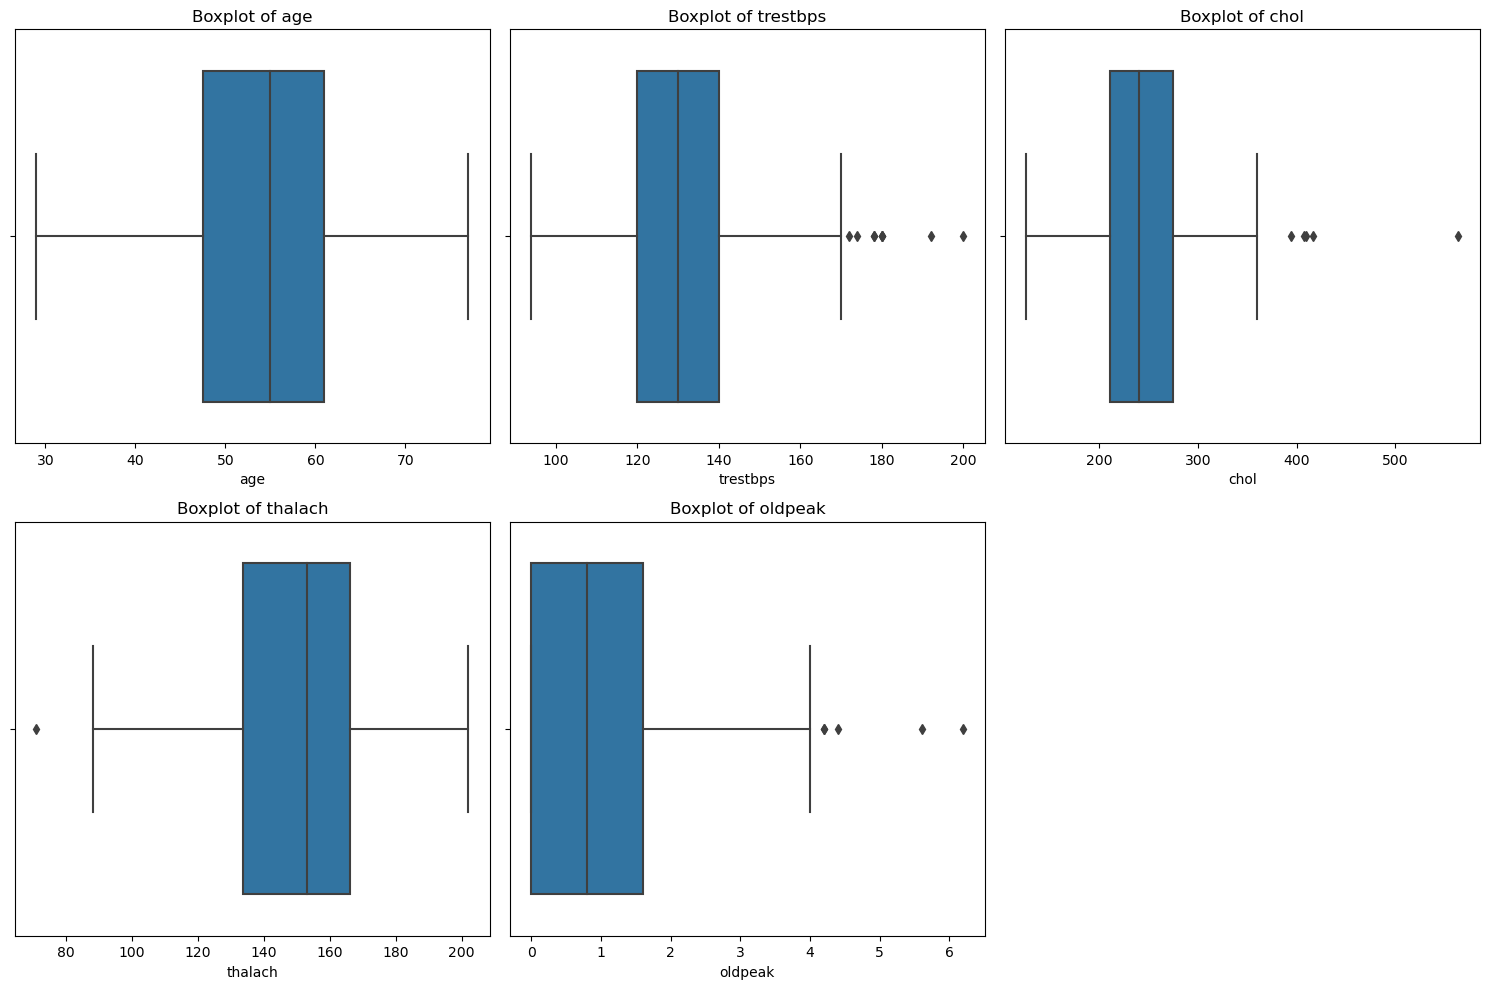

In [7]:
rows, cols = 2, 3
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i + 1)  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)


plt.tight_layout()

plt.show()

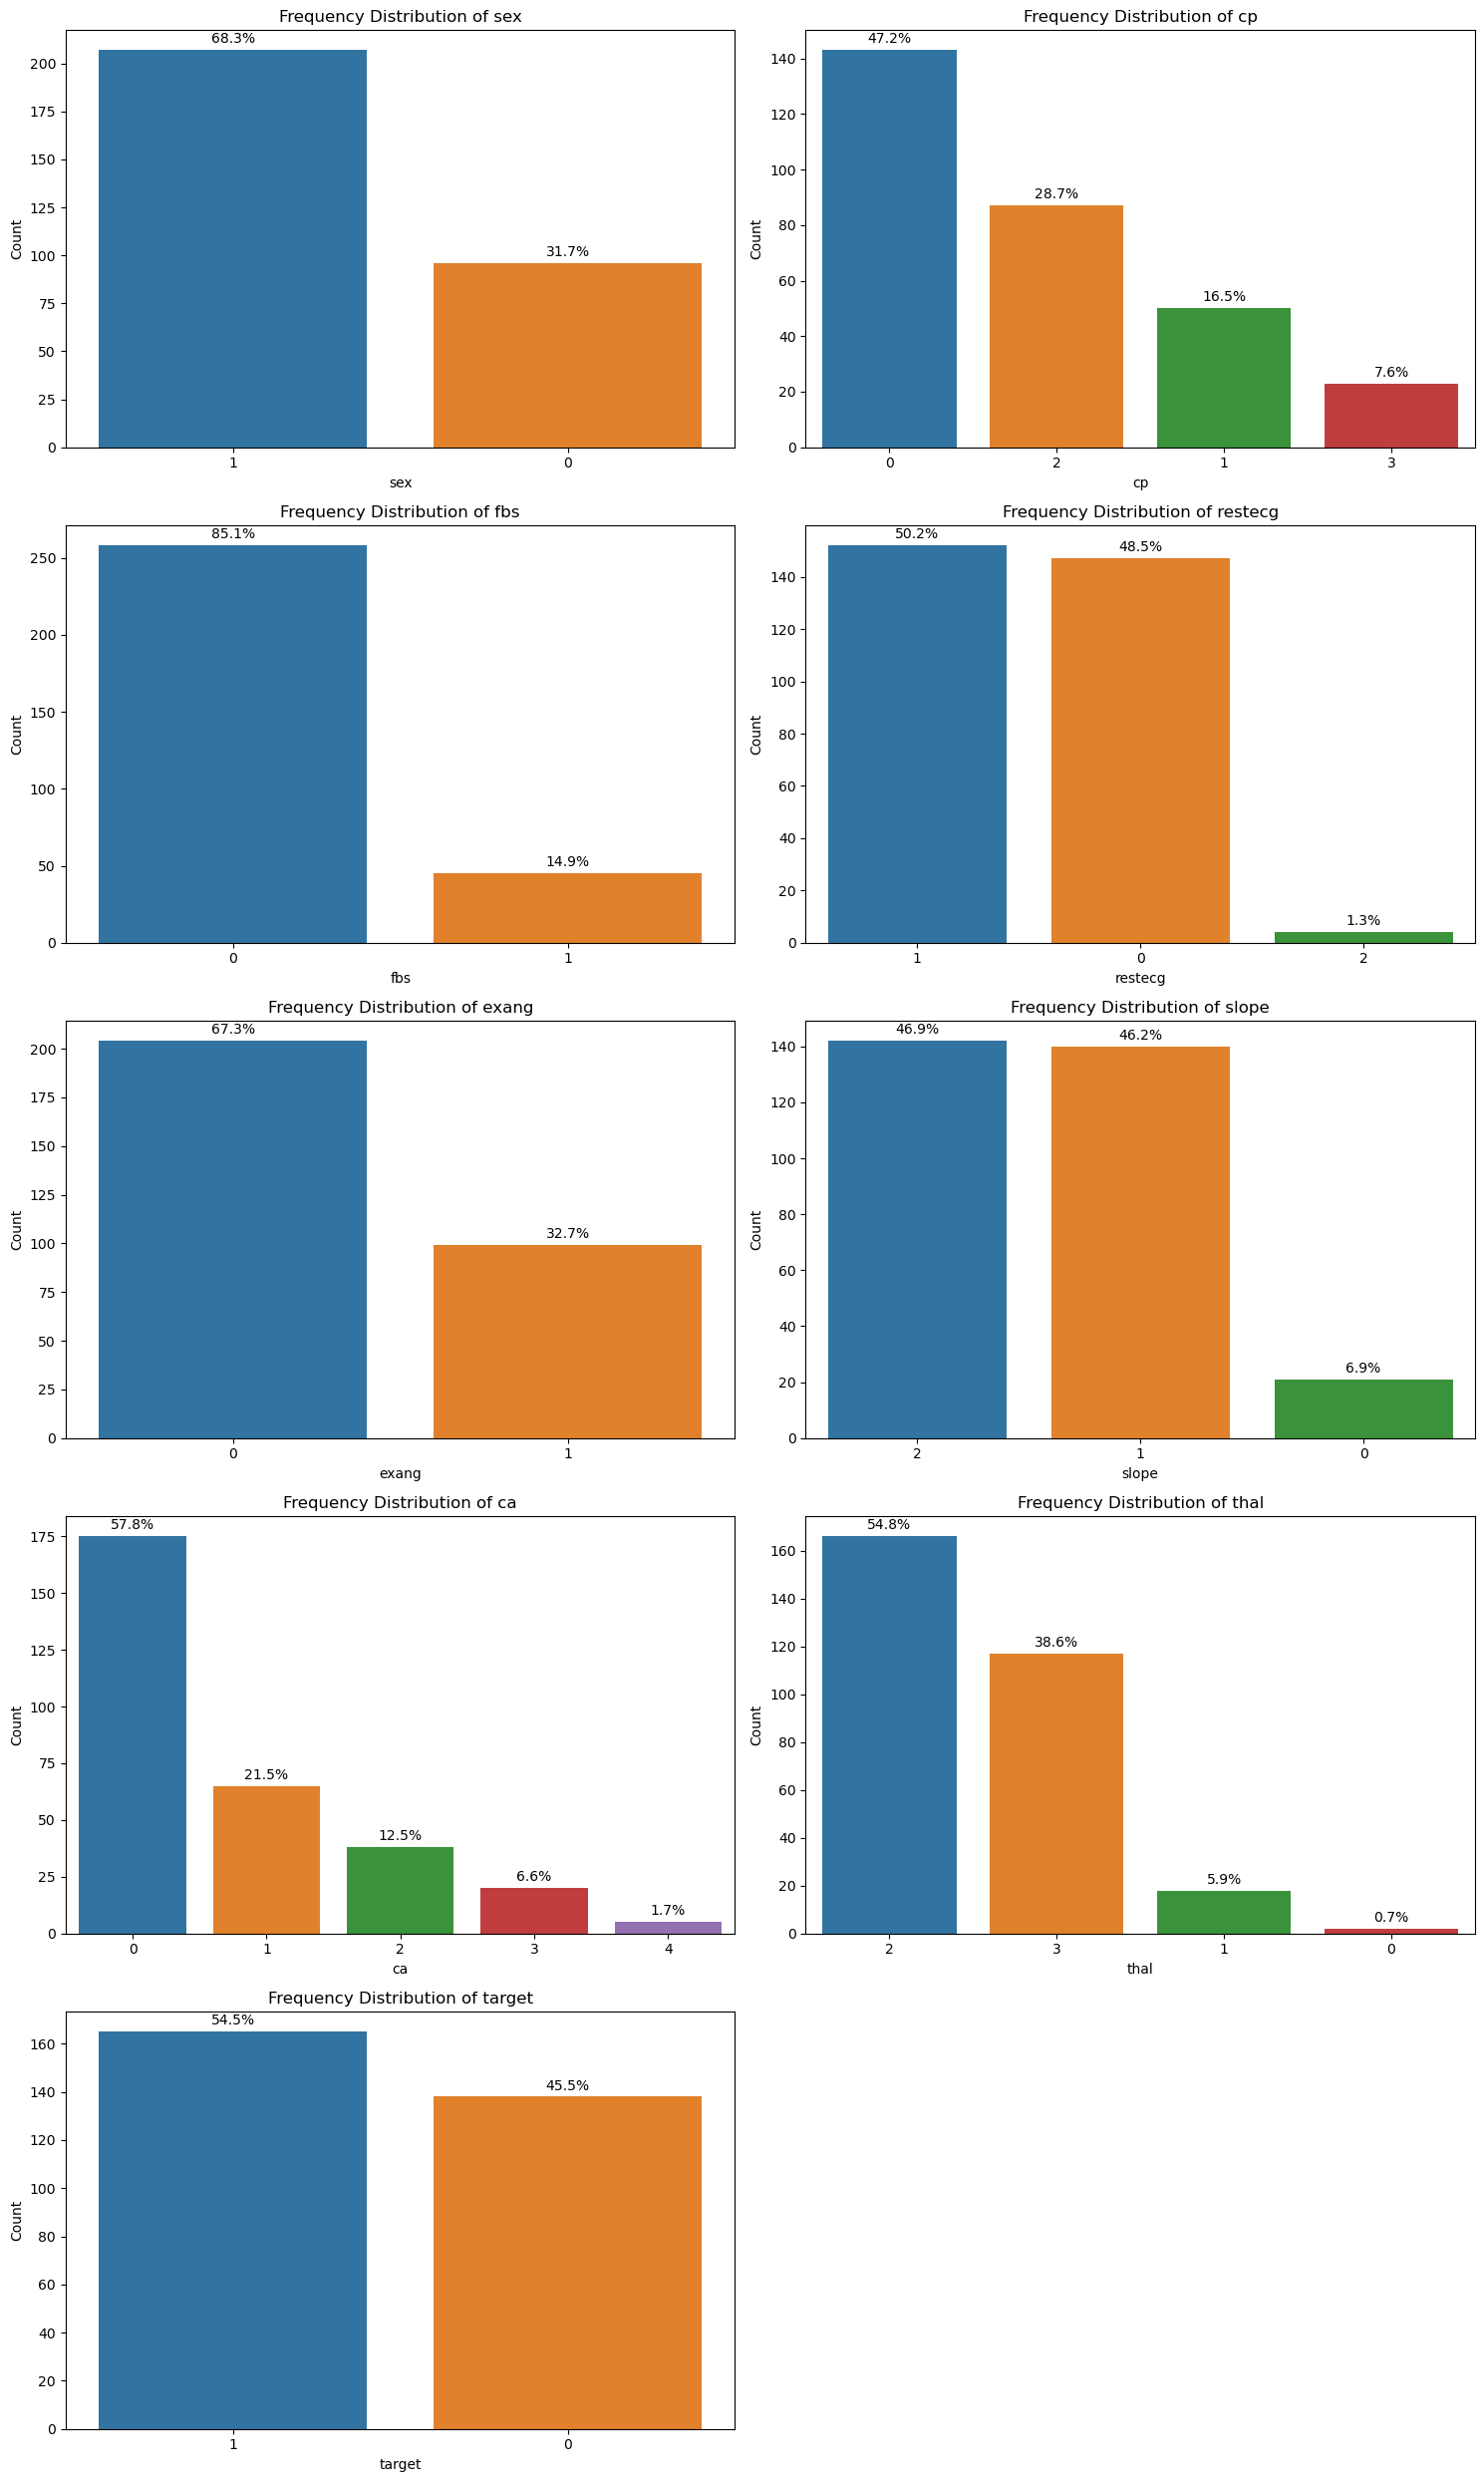

In [8]:
# Combining categorical and target features into a single list
cat_dist = categorical + target

# Defining the number of rows and columns for the grid
rows = (len(cat_dist) + 1) // 2  # +1 to handle odd numbers
cols = 2

# Setting up the plotting area with an appropriate figure size
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

# Flatten axes for easy iteration if there's more than one row
axes = axes.flatten()

# Looping through each feature in the combined list
for i, col in enumerate(cat_dist):
    # Calculate count and percentage
    count = df[col].value_counts()
    percent = 100 * count / len(df)
    
    # Creating a bar plot for the current column
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
    # Annotate each bar with the percentage
    for p, percentage in zip(axes[i].patches, percent):
        height = p.get_height()
        axes[i].annotate(f'{percentage:.1f}%', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Removing any empty subplots if the number of plots is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlap
plt.tight_layout()

plt.show()

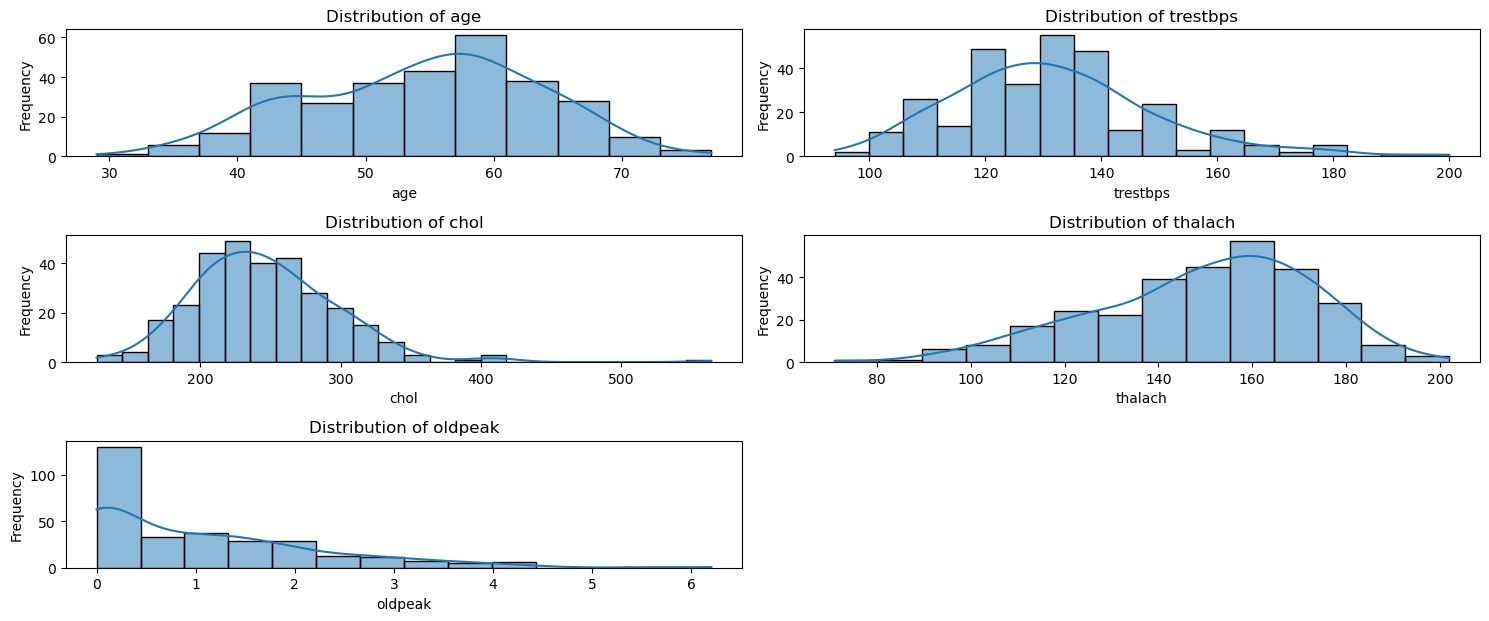

In [9]:
plt.figure(figsize=(15, 10))


for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i + 1)  
    sns.histplot(df[col], kde=True)  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()


plt.show()

Right-Skewed: trestbps, chol, oldpeak
Relatively Normal: age, thalach

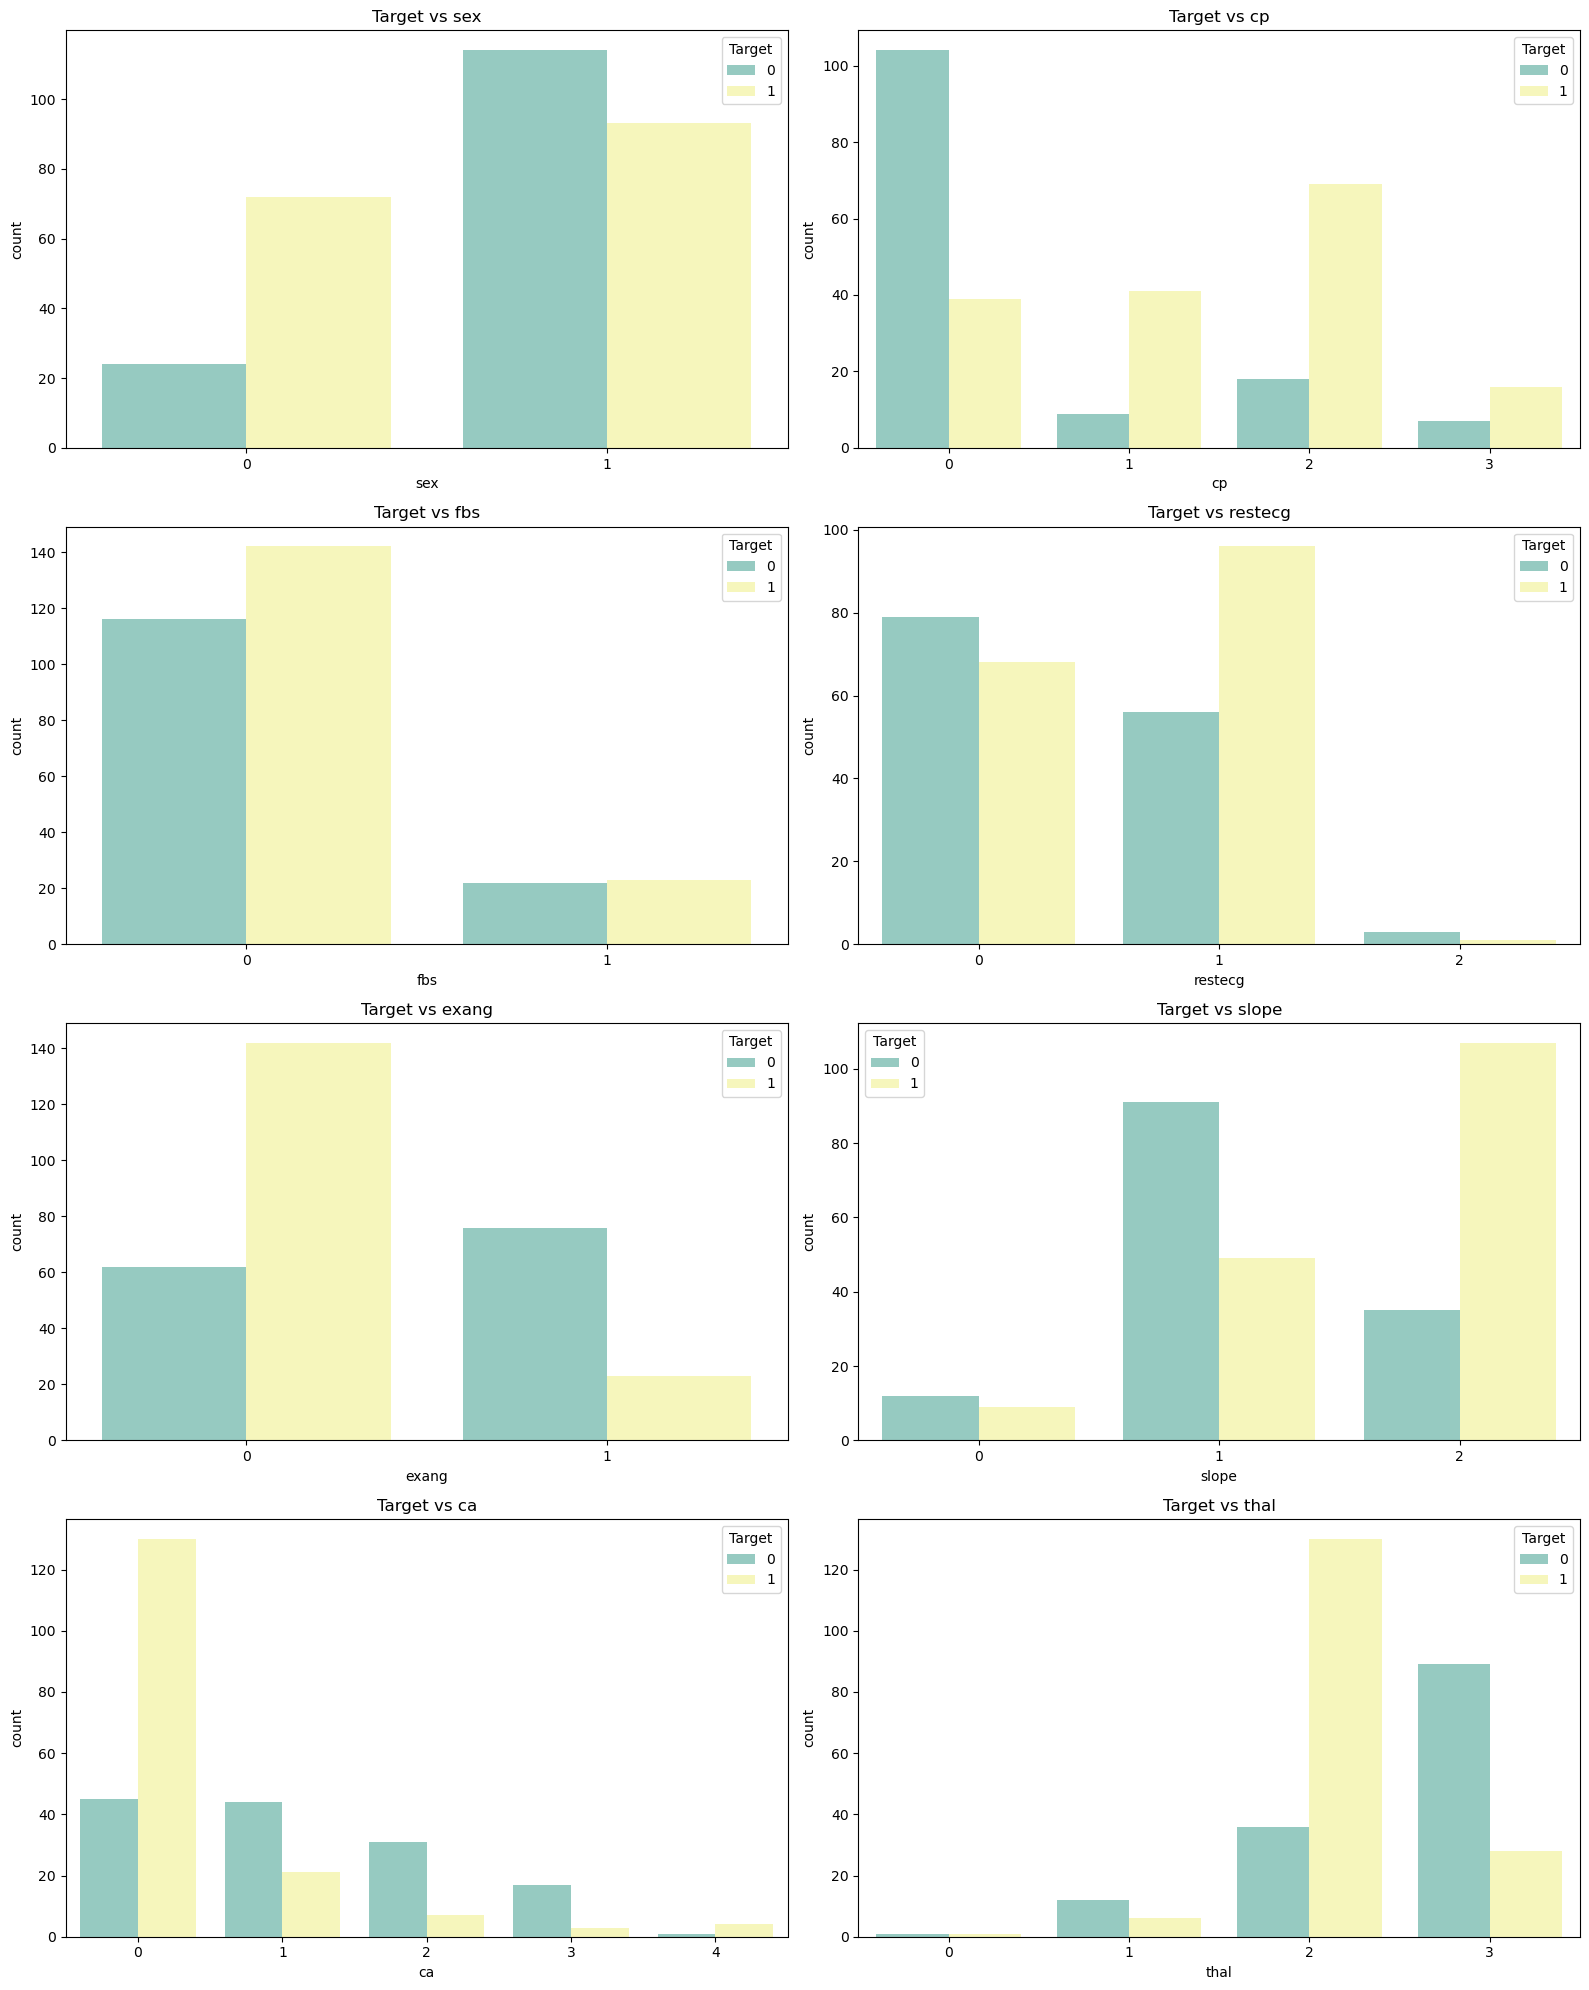

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))  
axes = axes.flatten()  

for i, col in enumerate(categorical):
    sns.countplot(x=col, hue="target", data=df, palette="Set3", ax=axes[i])
    axes[i].set_title("Target vs {}".format(col))
    axes[i].legend(title="Target")

plt.tight_layout()
plt.show()

#The categorical variables analyzed show clear patterns in relation to heart disease prediction. Specifically, male gender, certain chest pain types, ST-T wave abnormalities, absence of exercise-induced angina, upsloping ST segments, fewer major vessels colored, and certain thalassemia results are associated with a higher likelihood of heart disease. These factors are likely important predictors in a heart disease model and should be given attention when assessing heart disease risk in patients.

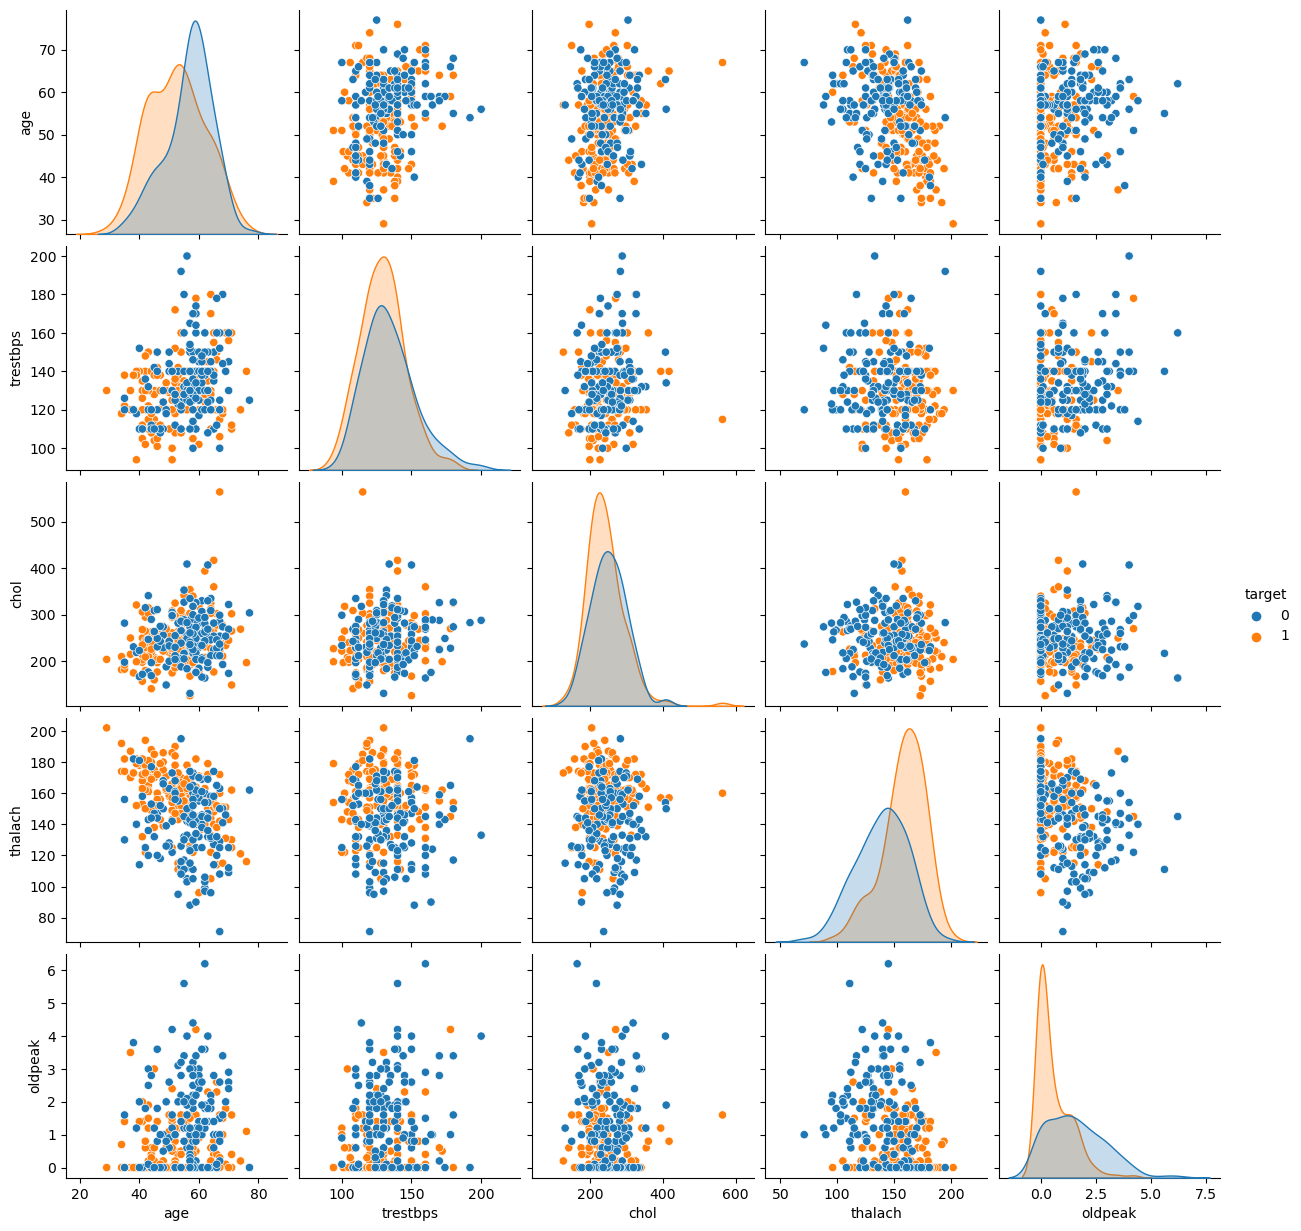

In [11]:
sns.pairplot(df, hue='target', vars=numerical)
plt.show()

The pair plot reveals that while some features like thalach and oldpeak might be useful in distinguishing between individuals with and without heart disease, many of the other numerical features do not show a clear separation between the target classes. This suggests that more advanced techniques, possibly involving feature interactions or nonlinear modeling, might be necessary to effectively predict heart disease in this dataset.

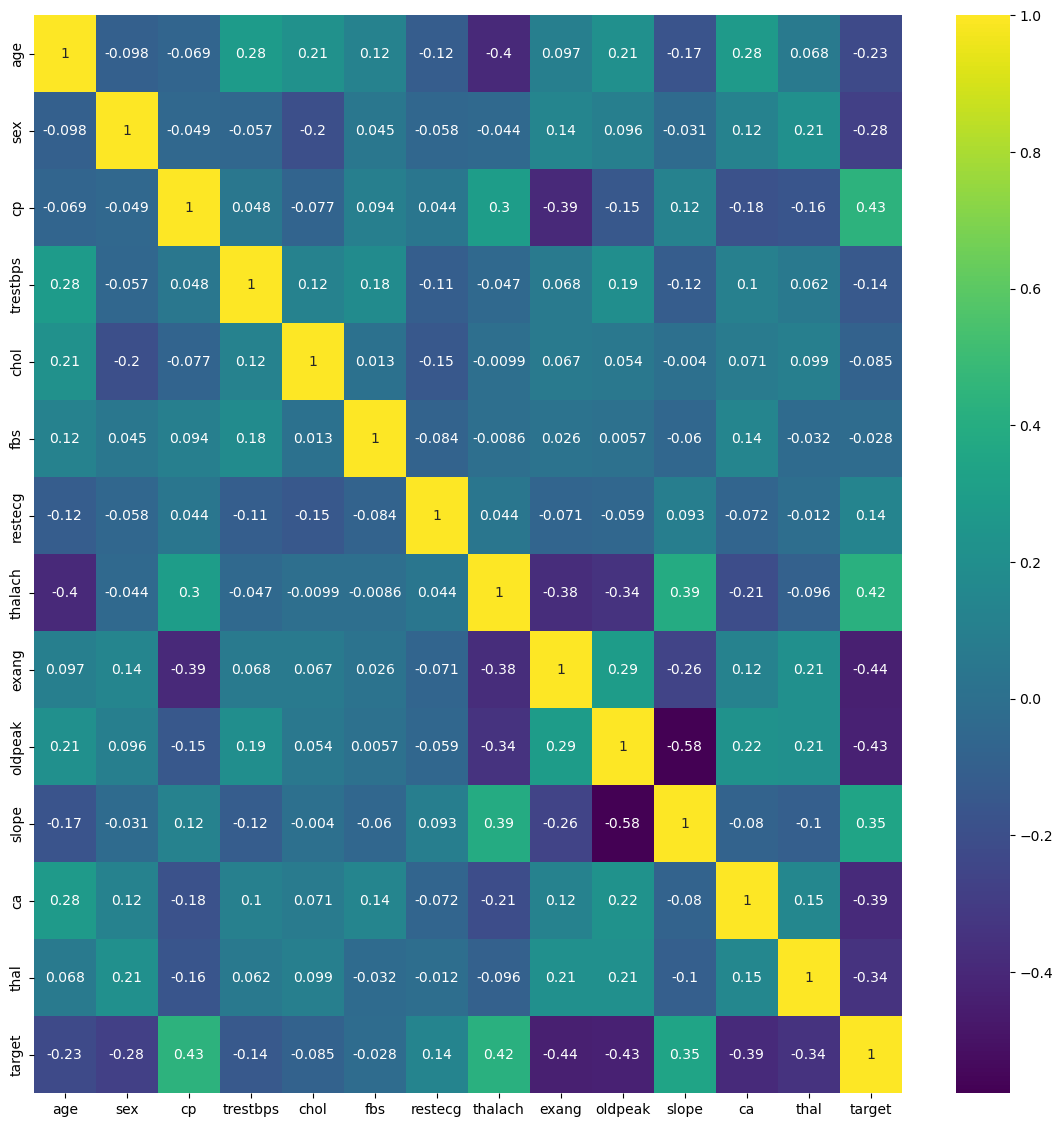

In [12]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [13]:
df.drop(['chol', 'fbs'], axis=1, inplace=True)
df.head(3)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1


In [14]:
from sklearn.model_selection import train_test_split
 
X = df.drop(['target'],axis =1)
y = df['target']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp

In [16]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
   
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Training is success!
ROC AUC: 0.9220
KS: 0.8125 (p-value: 5.661e-13)
Classification report SVC : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



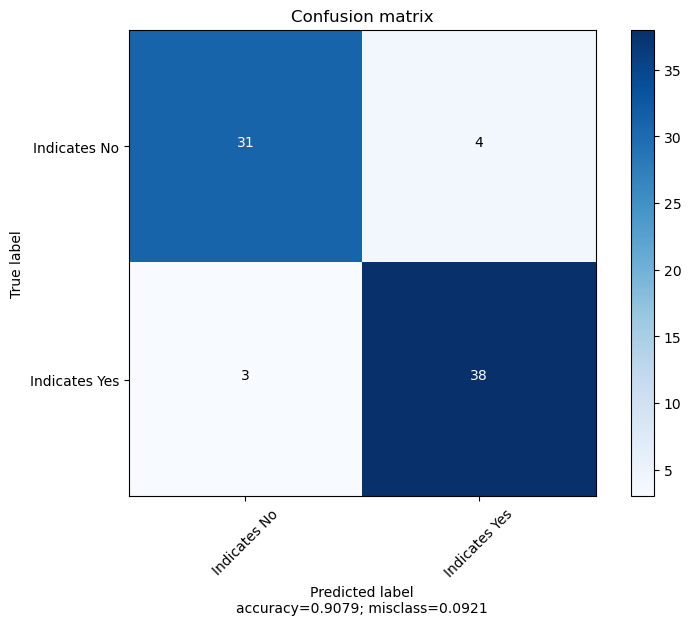

In [21]:
best_model = SVC(probability=True)
best_model.fit(X_train, y_train) 
print("Training is success!")
y_pred = best_model.predict_proba(X_test)
predicted = best_model.predict(X_test)

ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report SVC : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)